In [4]:
import pandas as pd

# Load your data into a DataFrame
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/benin-malanville.csv')

# Basic Overview
df.info()
df.describe(include='all')

# Missing Values
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 5])  # >5% nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71332 entries, 0 to 71331
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      71332 non-null  object 
 1   GHI            71332 non-null  float64
 2   DNI            71332 non-null  float64
 3   DHI            71332 non-null  float64
 4   ModA           71332 non-null  float64
 5   ModB           71332 non-null  float64
 6   Tamb           71331 non-null  float64
 7   RH             71331 non-null  float64
 8   WS             71331 non-null  float64
 9   WSgust         71331 non-null  float64
 10  WSstdev        71331 non-null  float64
 11  WD             71331 non-null  float64
 12  WDstdev        71331 non-null  float64
 13  BP             71331 non-null  float64
 14  Cleaning       71331 non-null  float64
 15  Precipitation  71331 non-null  float64
 16  TModA          71331 non-null  float64
 17  TModB          71331 non-null  float64
 18  Commen

In [5]:
from scipy.stats import zscore

# Target columns
target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[target_cols].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

# Flagging
df['Outlier'] = outliers

# Impute or Drop
for col in target_cols:
    df[col] = df[col].fillna(df[col].median())


In [6]:
# Save cleaned CSV
df_cleaned = df[~df['Outlier']]
df_cleaned.to_csv('/content/benin-malanville.csv', index=False)


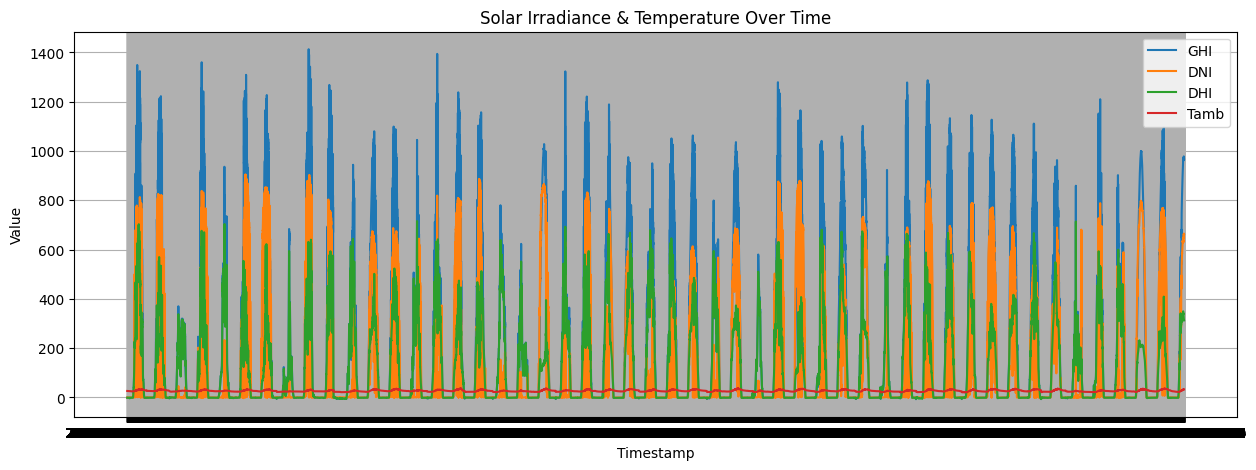

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Solar Irradiance & Temperature Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.grid(True)
plt.show()


<Axes: title={'center': 'ModA/ModB Before vs After Cleaning'}, xlabel='Cleaned'>

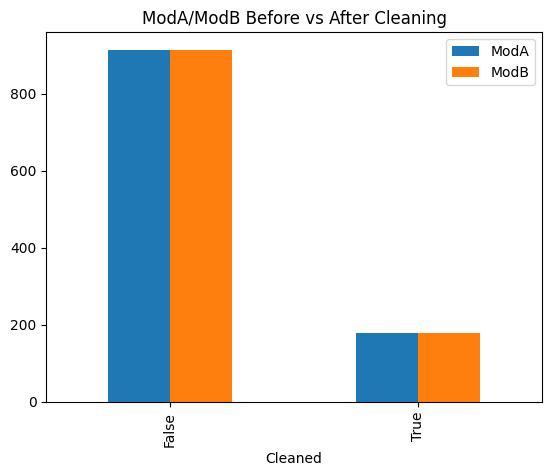

In [8]:
# Mean before and after cleaning
df['Cleaned'] = ~df['Outlier']
df.groupby('Cleaned')[['ModA', 'ModB']].mean().plot(kind='bar', title='ModA/ModB Before vs After Cleaning')


Text(0.5, 1.0, 'Correlation Heatmap')

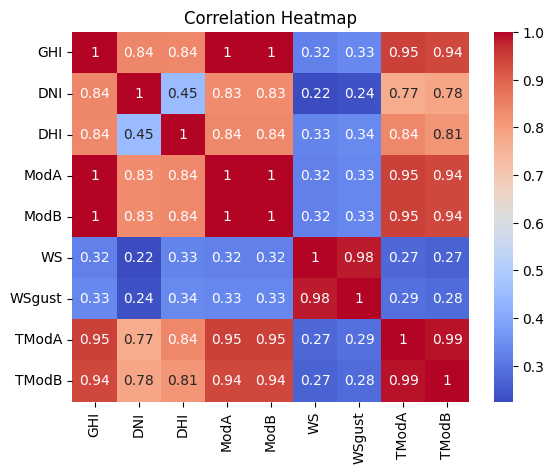

In [9]:
import seaborn as sns

corr = df[target_cols + ['TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


<Axes: xlabel='WS', ylabel='GHI'>

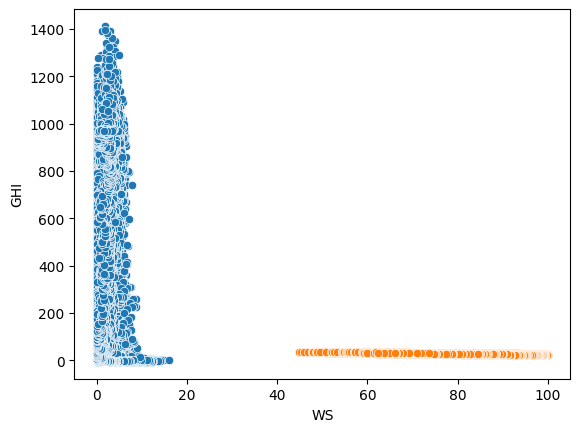

In [10]:
sns.scatterplot(x='WS', y='GHI', data=df)
sns.scatterplot(x='RH', y='Tamb', data=df)


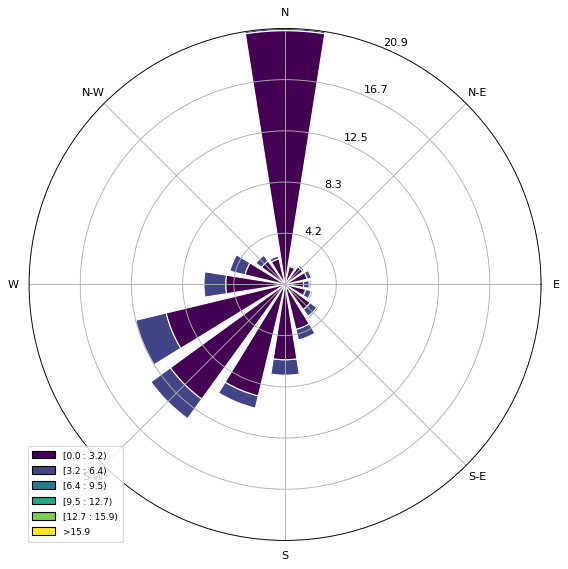

In [13]:
!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


Text(0.5, 1.0, 'Wind Speed Distribution')

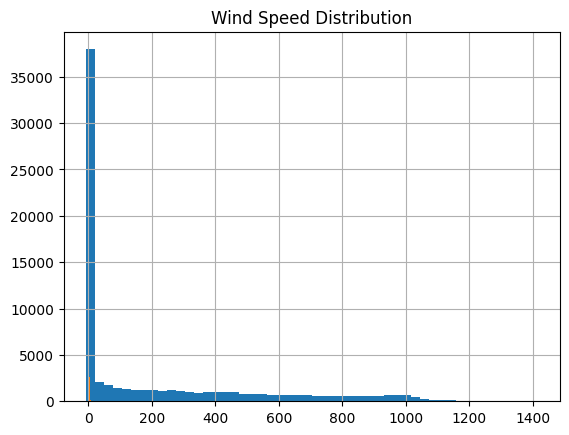

In [14]:
df['GHI'].hist(bins=50)
plt.title("GHI Distribution")

df['WS'].hist(bins=50)
plt.title("Wind Speed Distribution")


Text(0.5, 1.0, 'Temperature vs RH with GHI Influence')

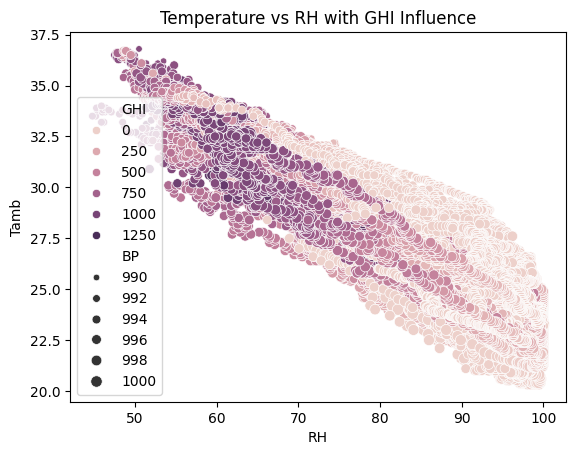

In [15]:
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='BP', data=df)
plt.title("Temperature vs RH with GHI Influence")


Text(0, 0.5, 'Tamb')

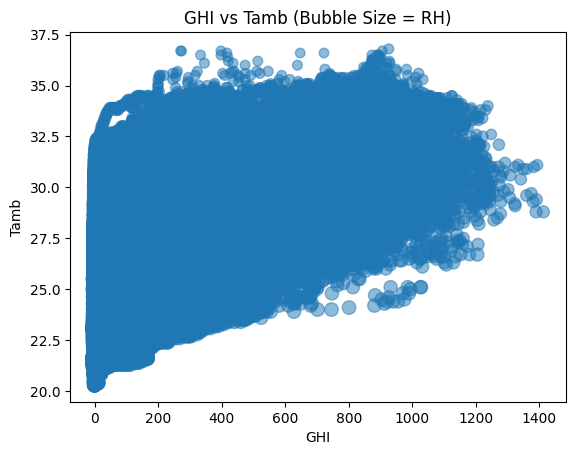

In [16]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")


In [19]:
!git add notebooks/Benin_eda.ipynb
!git commit -m "feat: EDA for benin solar dataset"
!git push origin eda-benin


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
